# **Categorical and Count Data**
#### Section 7

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.power as smp
import statsmodels.stats.proportion as smprop


## **Stocastic varibale for a proportion (for en andel)**

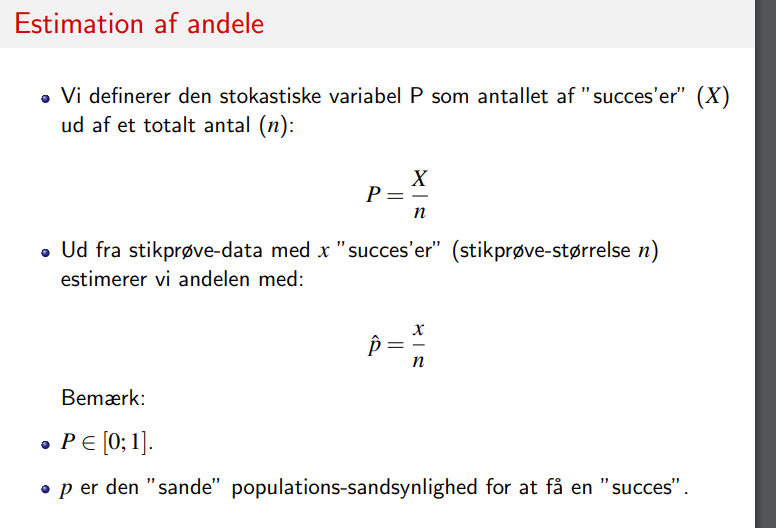

* Husk stort bogstav foran en stokastisk varibel



## **Bionomial fordelingen for en andel**

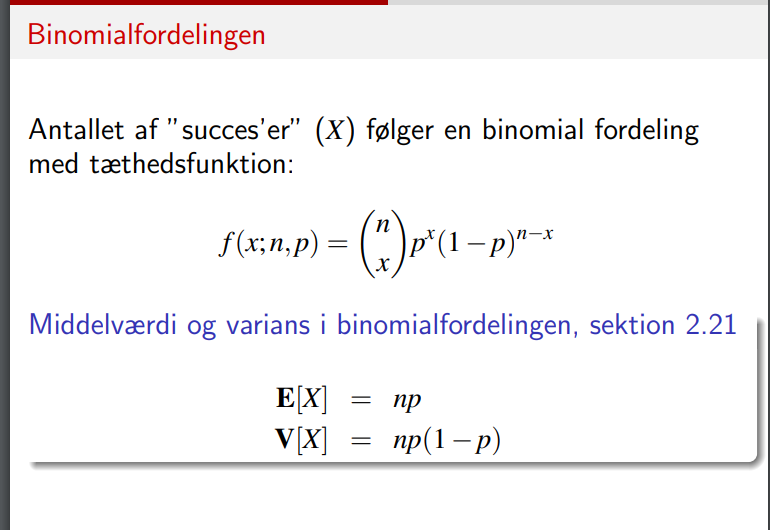

## **Middelværdi og varians for andele**

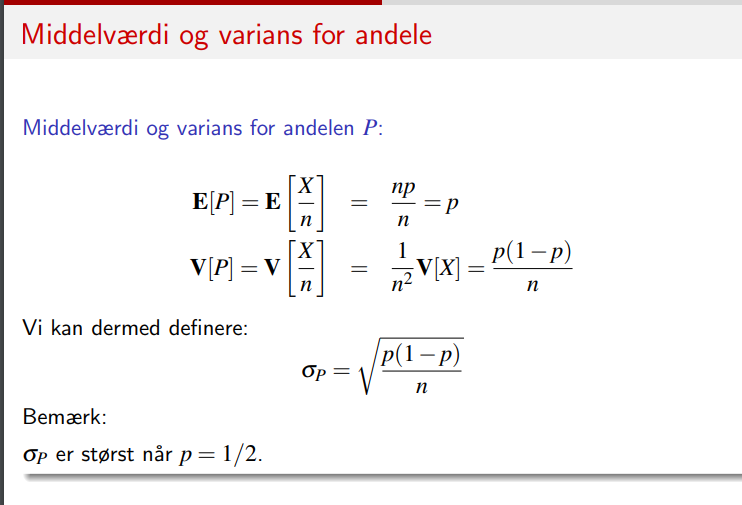

---

## **Konfidensinterval for en anden**
### Stikprøvestørrelse og forsøgsplanlægning

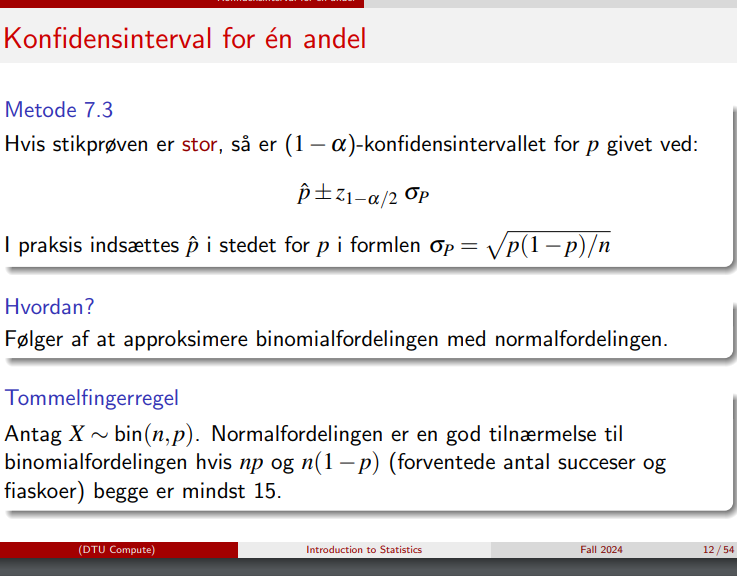


### Example: Normal approximation of binomialdistribution

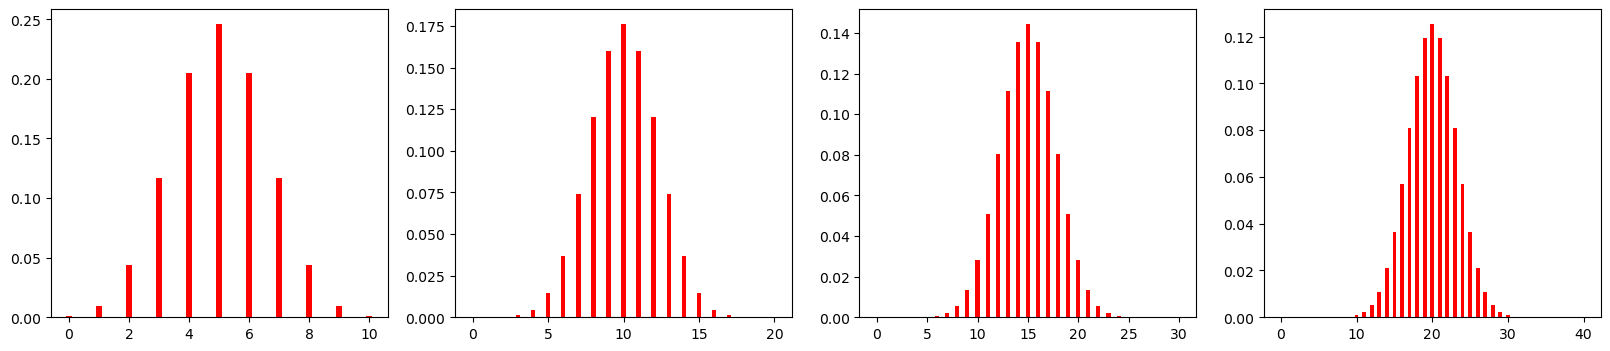

In [2]:
# Lets plot some binomialdistributions with p = 0.50 and increasing number of observation (n)

fig, axs = plt.subplots(1, 4, figsize=(20,4))

p = 1/2

n = 10
axs[0].bar(np.arange(0, n+1, 1), stats.binom.pmf(k=np.arange(0,n+1,1), n=n, p=p), width=0.2, color='red')
n = 20
axs[1].bar(np.arange(0, n+1, 1), stats.binom.pmf(k=np.arange(0,n+1,1), n=n, p=p), width=0.3, color='red')
n = 30
axs[2].bar(np.arange(0, n+1, 1), stats.binom.pmf(k=np.arange(0,n+1,1), n=n, p=p), width=0.4, color='red')
n = 40
axs[3].bar(np.arange(0, n+1, 1), stats.binom.pmf(k=np.arange(0,n+1,1), n=n, p=p), width=0.5, color='red')
plt.show()

We see that the binomial for lager n looks more and more like a normal distribution.

But this is a little different if p not 1/2 - the binomial distribution is non-symmetric and therefore also less "normal" looking:

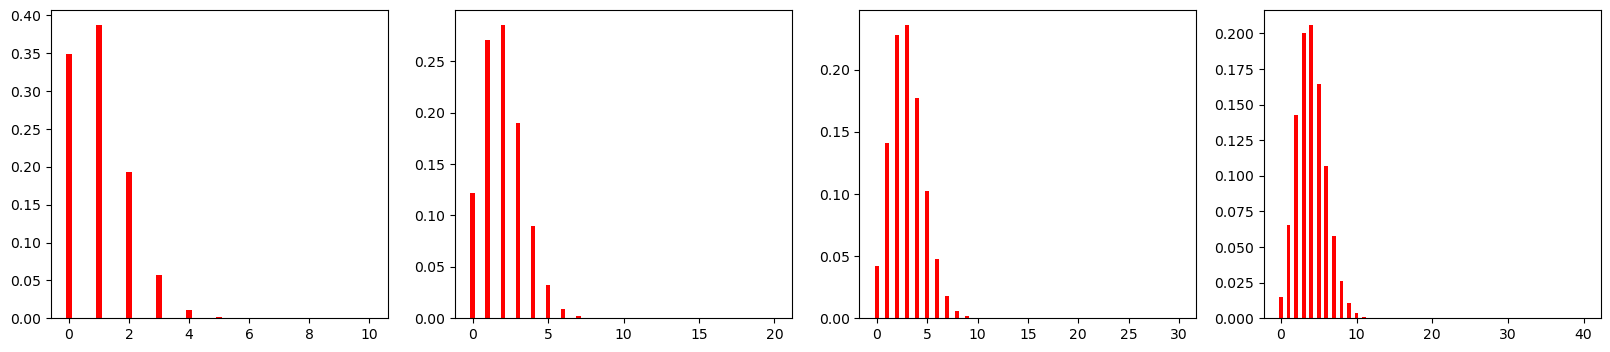

In [3]:
# Lets plot some binomialdistributions with p = 0.10 and increasing number of observation (n)

fig, axs = plt.subplots(1, 4, figsize=(20,4))

p = 1/10

n = 10
axs[0].bar(np.arange(0, n+1, 1), stats.binom.pmf(k=np.arange(0,n+1,1), n=n, p=p), width=0.2, color='red')
n = 20
axs[1].bar(np.arange(0, n+1, 1), stats.binom.pmf(k=np.arange(0,n+1,1), n=n, p=p), width=0.3, color='red')
n = 30
axs[2].bar(np.arange(0, n+1, 1), stats.binom.pmf(k=np.arange(0,n+1,1), n=n, p=p), width=0.4, color='red')
n = 40
axs[3].bar(np.arange(0, n+1, 1), stats.binom.pmf(k=np.arange(0,n+1,1), n=n, p=p), width=0.5, color='red')
plt.show()

We see the change when n increasis, but is does not look normal - it is still a-symmetric when n = 40 (right most plot)

What if we increase n even more?

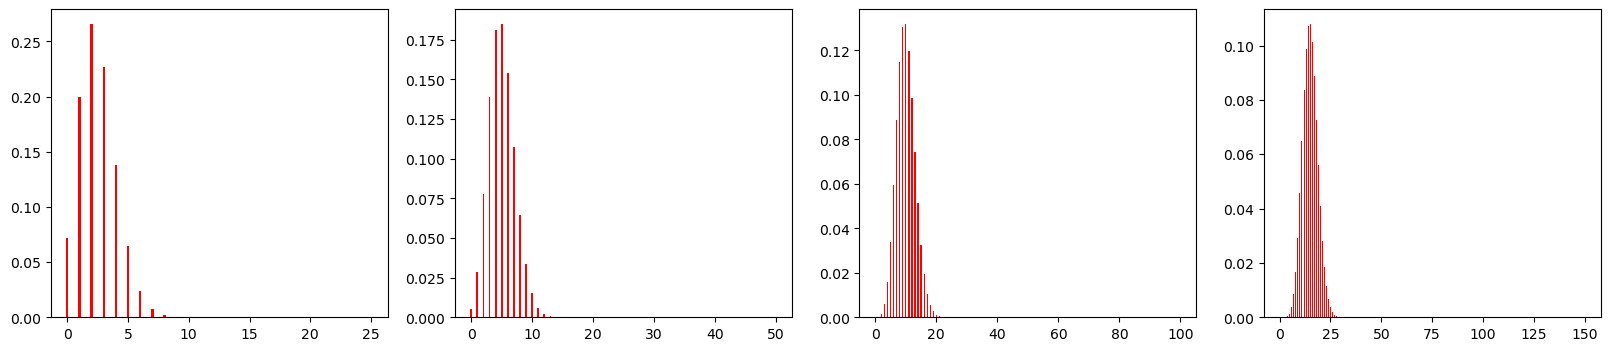

In [4]:
fig, axs = plt.subplots(1, 4, figsize=(20,4))

p = 1/10

n = 25
axs[0].bar(np.arange(0, n+1, 1), stats.binom.pmf(k=np.arange(0,n+1,1), n=n, p=p), width=0.2, color='red')
n = 50
axs[1].bar(np.arange(0, n+1, 1), stats.binom.pmf(k=np.arange(0,n+1,1), n=n, p=p), width=0.3, color='red')
n = 100
axs[2].bar(np.arange(0, n+1, 1), stats.binom.pmf(k=np.arange(0,n+1,1), n=n, p=p), width=0.4, color='red')
n = 150
axs[3].bar(np.arange(0, n+1, 1), stats.binom.pmf(k=np.arange(0,n+1,1), n=n, p=p), width=0.5, color='red')
plt.show()

Eventually (when n = 150) the distribution does look much more like a normal distribution.

Conclusion: the normal distribution is a good approximation is n is large enough - and "enough" depends on the value of p.


### Husk:

* Normalfordelingen er en god tilnærmelse til binomialfordelingen hvis np og n(1−p) (forventede antal succeser og fiaskoer) begge er mindst 15.


## **P-2 tilgang**:

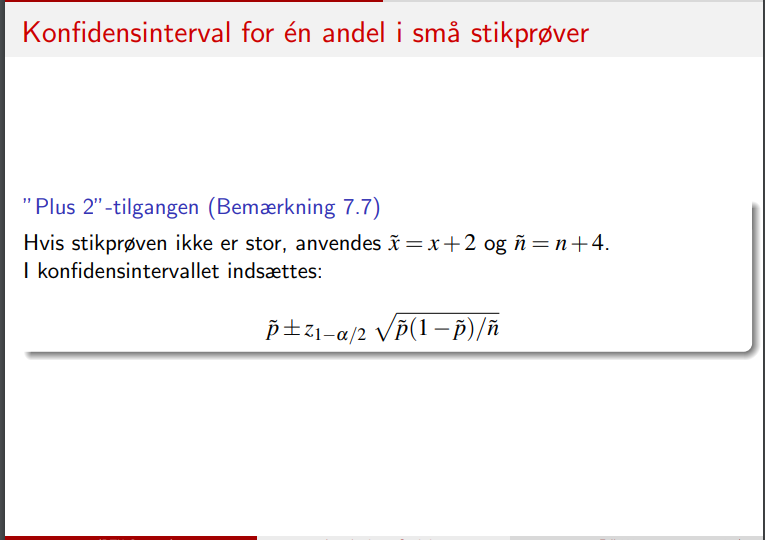


### Example: Confidence interval of proportion for left-handed

In [5]:
n = 100  # total number of people in the sample
x = 10   # number of lefthanded in the sample

p_hat = x/n
print(p_hat)

0.1


In [6]:
# compute the standard error
se_p_hat = np.sqrt(p_hat*(1-p_hat)/n)
print(se_p_hat)

0.030000000000000002


In [ ]:
# compute confidence-interval using normal-approximation
print([p_hat - 1.96*se_p_hat, p_hat + 1.96*se_p_hat]) #1.96 is where there is 2.5 procent out of the interval i standard normalfrodelingen

[0.0412, 0.1588]


In [8]:
# is it ok to use the normal approximation?
# is       np > 15 ?
# is   n(1-p) > 15 ?

print([n*p_hat, n*(1-p_hat)])

[10.0, 90.0]


These numbers are NOT both > 15

We should use another method for small samples

In [9]:
# Alternative method for small samples

# "plus-2" method:

p_tilde = (x+2)/(n+4)

se_p_tilde = np.sqrt(p_tilde*(1-p_tilde)/(n+4))

print([p_tilde - 1.96*se_p_tilde, p_tilde + 1.96*se_p_tilde])

[0.053981472743028336, 0.17678775802620245]


(try changing x to 3 and see what happens to the confidence interval - this is an extreme case of the normal assumption not being valid)

## **Margin of error:**

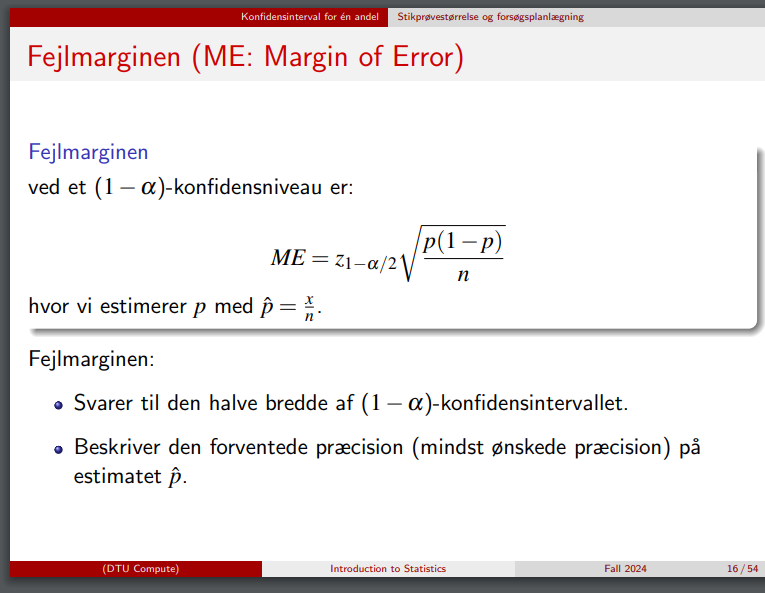


## **Præcision og stikprøvestørrelse**:
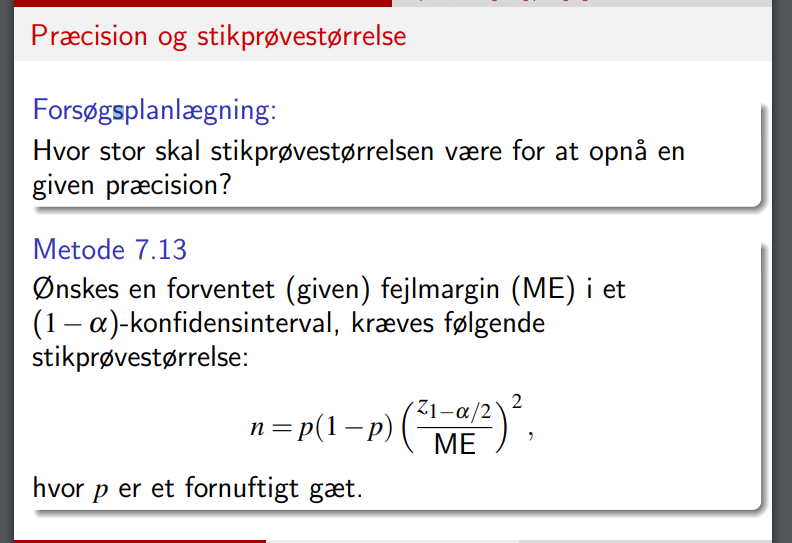

### Nu ud fra eksempel 1:
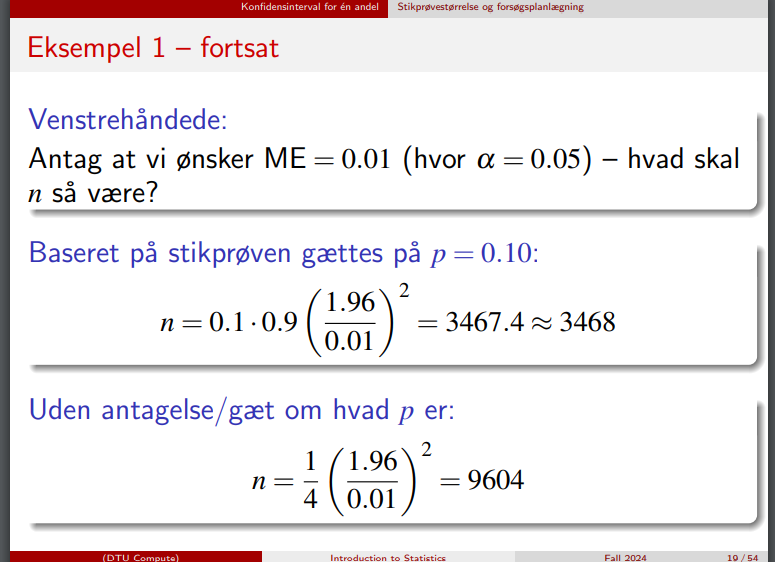


---


## **Hypotesetest for en anden**


### **Generelle trin i en hypotesetest:**

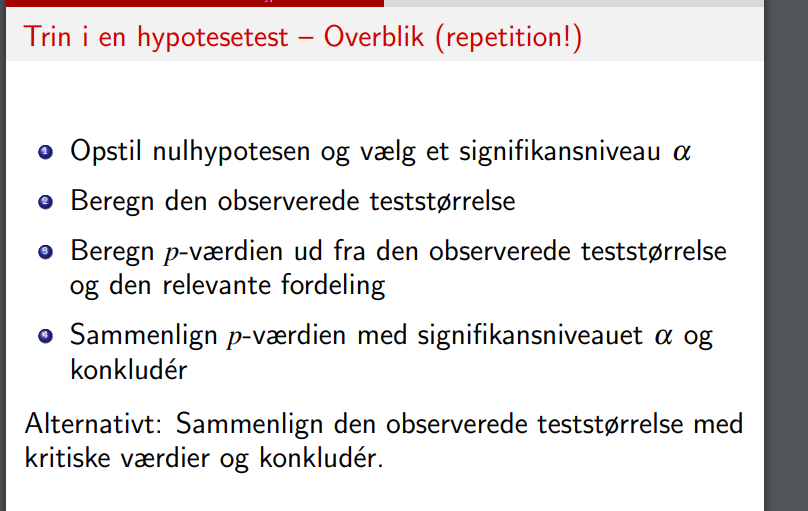

## **Hypotesetest for en andel**:
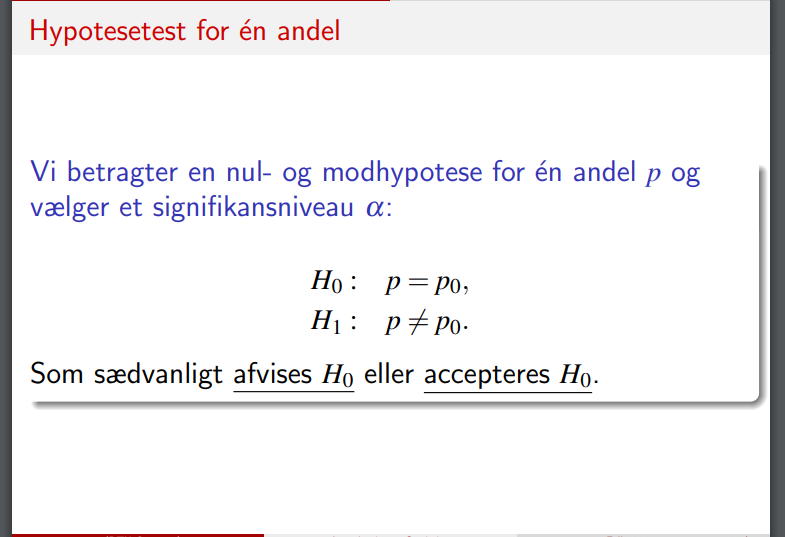

### **Teststørrelsen:**

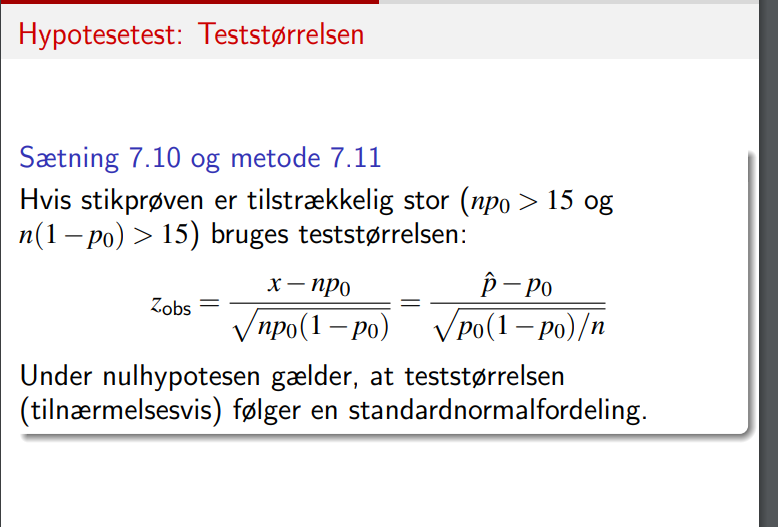

### **p-værdien og konklusion**:

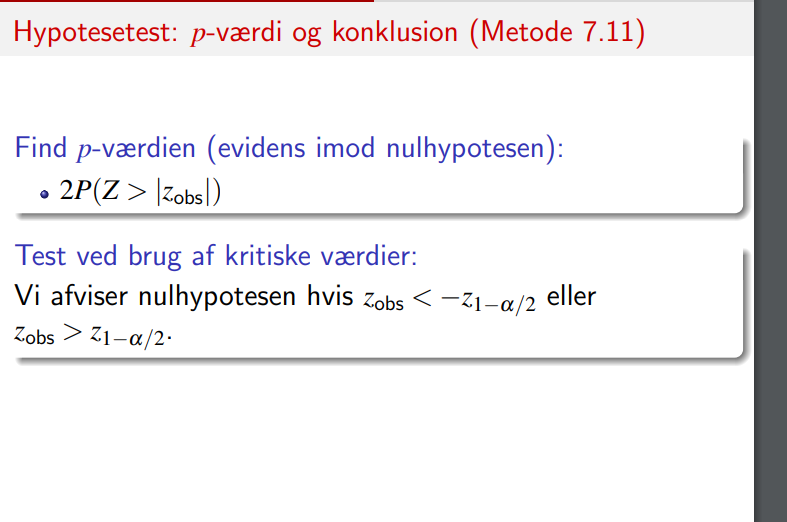

### Example: Hypothesis test for proportion of left-handed

"Are half of all Danish citizens left-handed?"

We want to test if the true proportion could be $p_0 = 0.50$ (50:50 left and right-handed people)

In [10]:
z_obs,p_value = smprop.proportions_ztest(count=10, nobs=100, value=0.5, prop_var=0.5)
print(z_obs, p_value)

-8.0 1.244192114854348e-15


In [11]:
# We can also calculate z_obs *manually*:

z_obs = (0.10 - 0.50)/np.sqrt(0.50*(1-0.50)/100)

print(z_obs)

-8.0


In [12]:
# we can also find the p-value *manually*:

print(2*stats.norm.cdf(z_obs, loc=0, scale=1))

1.244192114854348e-15


---

# **Konfidensinterval og hypotesetest for to andele (proportions)**

## Konfidensinterval for forskellen:
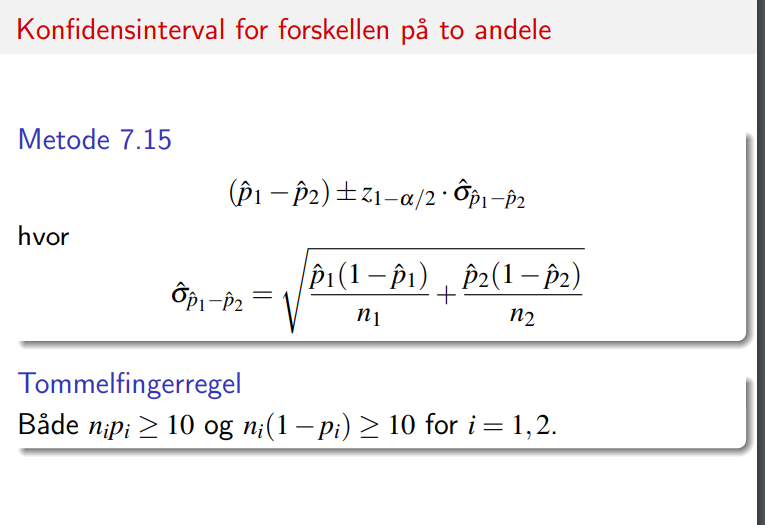

## Hypotesetest for forskellen på to andele:
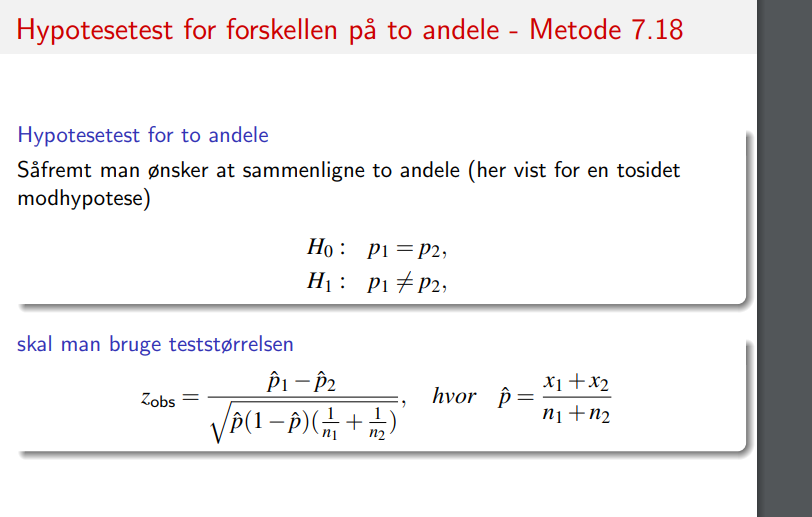

* ## husk at p hat er **overall proportion**



### Example: Contraceptive pills and risk of blood clots

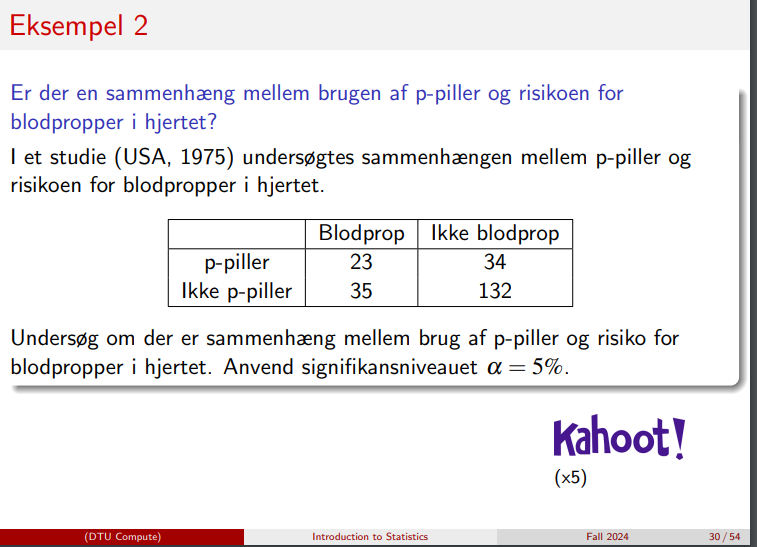

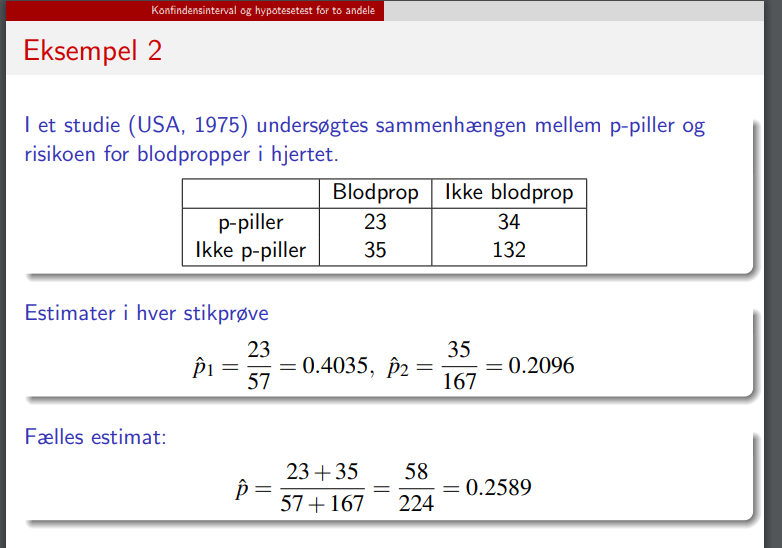

In [13]:
# Group using birth control pills:
x1 = 23
n1 = 23 + 34
p1 = x1/n1
print(p1)

0.40350877192982454


In [14]:
# Group bot using birth control pills (control group):
x2 = 35
n2 = 35 + 132
p2 = x2/n2
print(p2)

0.20958083832335328


In [15]:
# difference:
diff = p1-p2
print(diff)

0.19392793360647126


In [16]:
# confidence interval for diff:
se_diff = np.sqrt(p1*(1-p1)/n1 + p2*(1-p2)/n2)

print([diff - 1.96*se_diff, diff + 1.96*se_diff])

[0.05239234287574965, 0.33546352433719284]


In [17]:
# Test for equal proportions in the two groups:

z_obs,p_value = smprop.proportions_ztest(count = [23, 35], nobs = [57, 167], value=0, prop_var=0)
print(z_obs, p_value)

2.8859712586466184 0.003902077897925702


In [18]:
# *Manual* calculations for the test:
p_pooled = (x1+x2)/(n1+n2)
print(p_pooled)

0.25892857142857145


In [19]:
z_obs = diff / np.sqrt(p_pooled*(1-p_pooled)*(1/n1 + 1/n2))
print(z_obs)

2.8859712586466184


In [20]:
print(2 * stats.norm.cdf(-z_obs, loc=0, scale=1))

0.003902077897925702


## Sammenligning af c andele (c betyder her bare et eller andet tal):
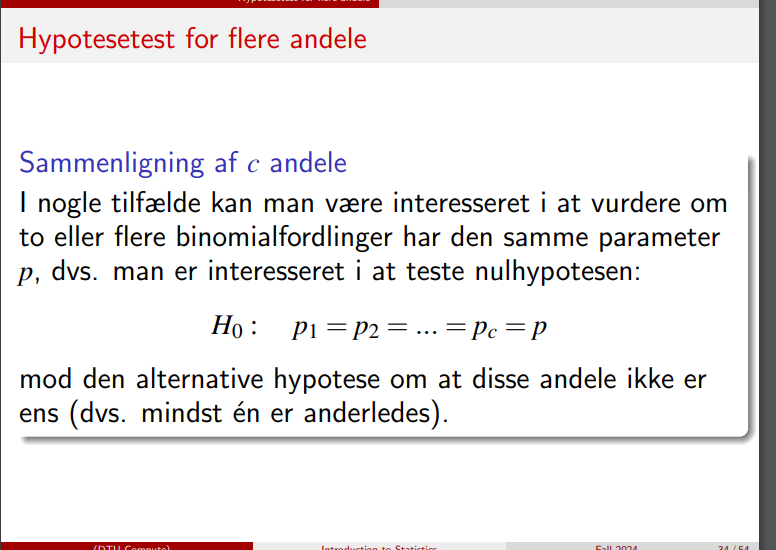

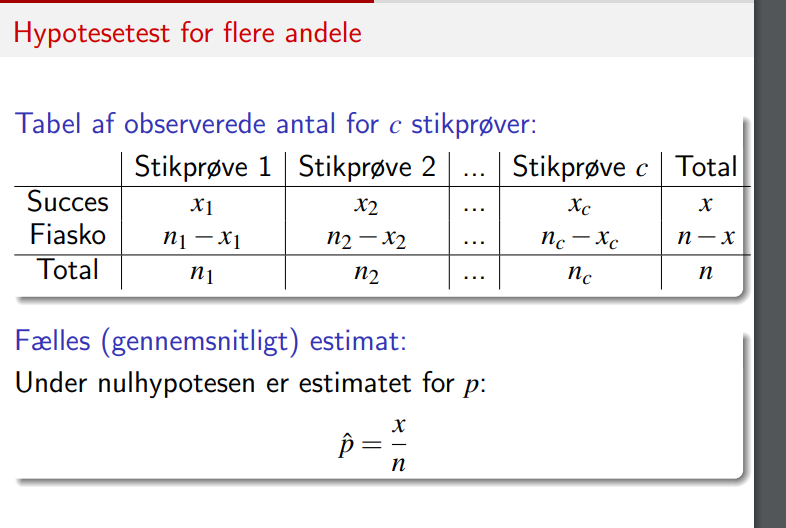

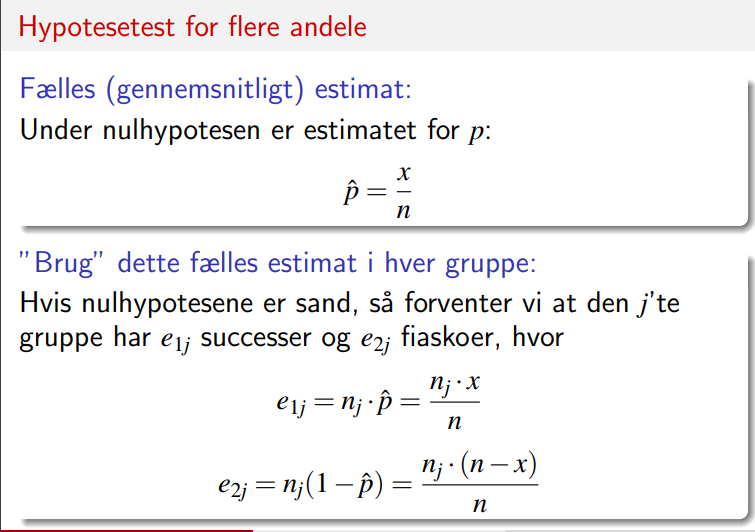

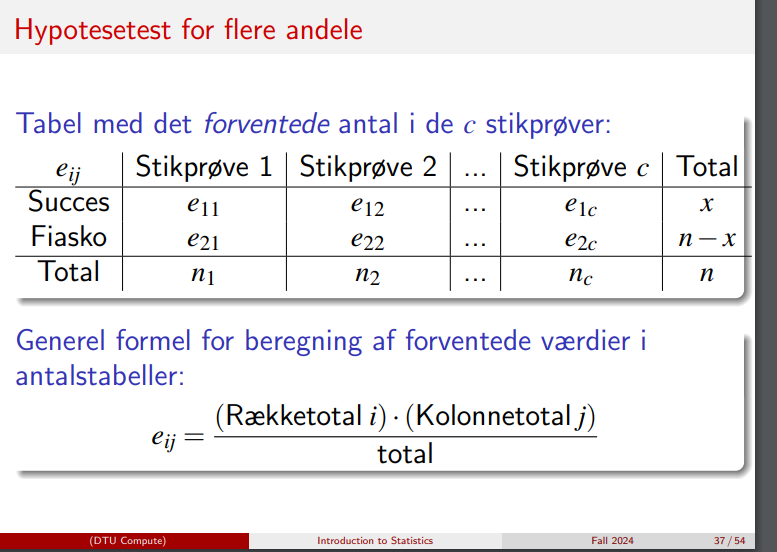

### Beregning af teststørrelsen:

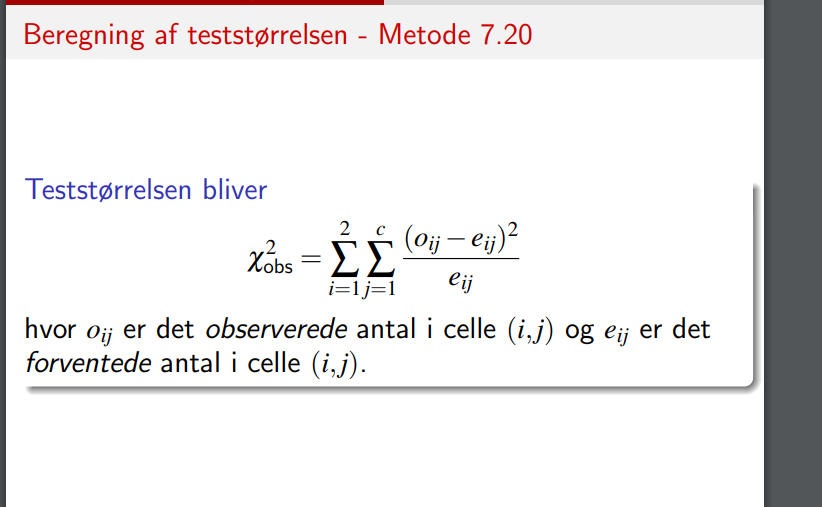

## Finde p-værdien eller brig kritisk værdi:
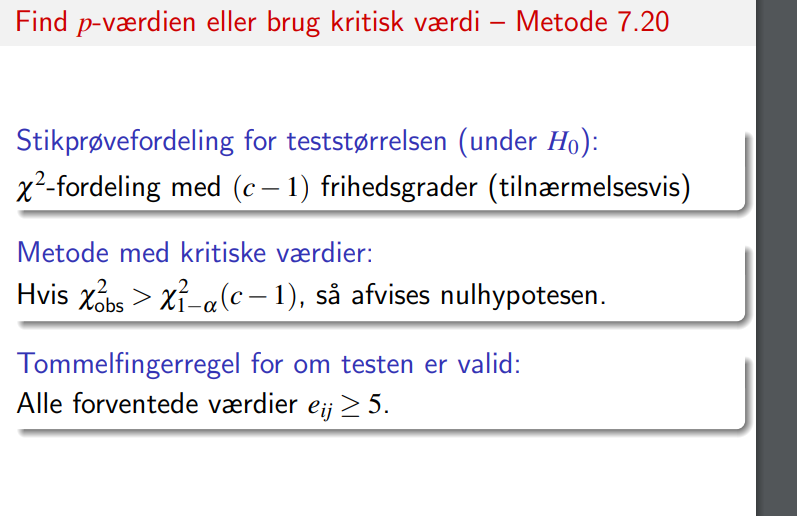

### Example: Contraceptive pills with $\chi^2$

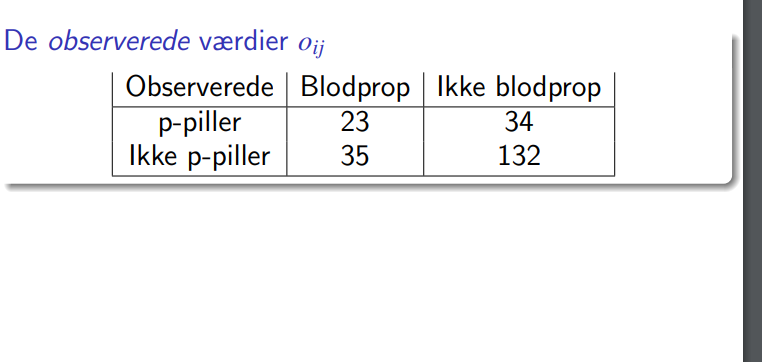

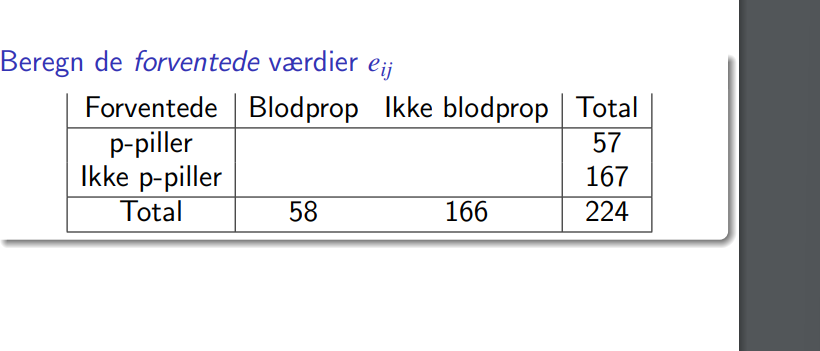

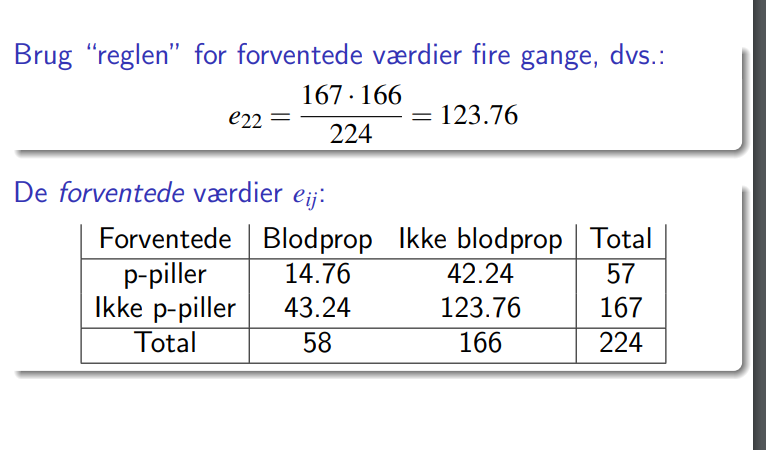

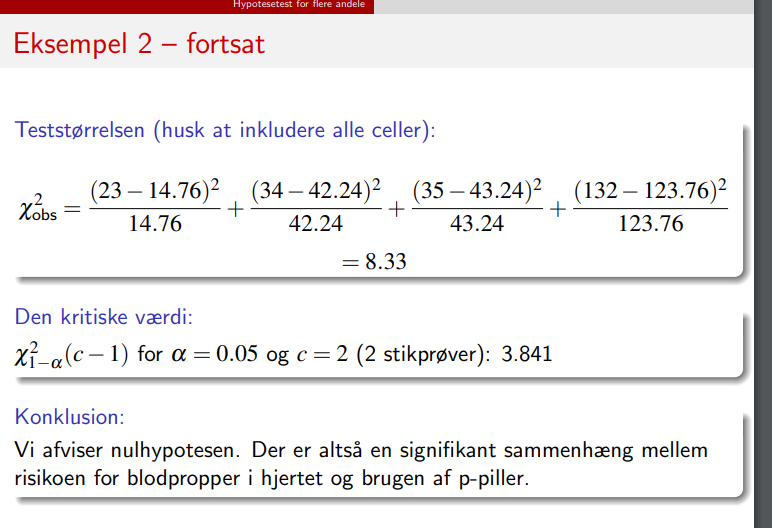

In [21]:
table_data = np.array([[23,35],[34,132]])
print(table_data)

[[ 23  35]
 [ 34 132]]


In [22]:
chi2, p_val, dof, expected = stats.chi2_contingency(table_data, correction=False)

In [23]:
print(expected)

[[ 14.75892857  43.24107143]
 [ 42.24107143 123.75892857]]


In [24]:
print(chi2)

8.328830105734347


In [25]:
print(p_val)

0.0039020778979257016


In [26]:
print(dof)

1


---

## **Statistik for antalstabeller**

### Example: Candidate votes over time

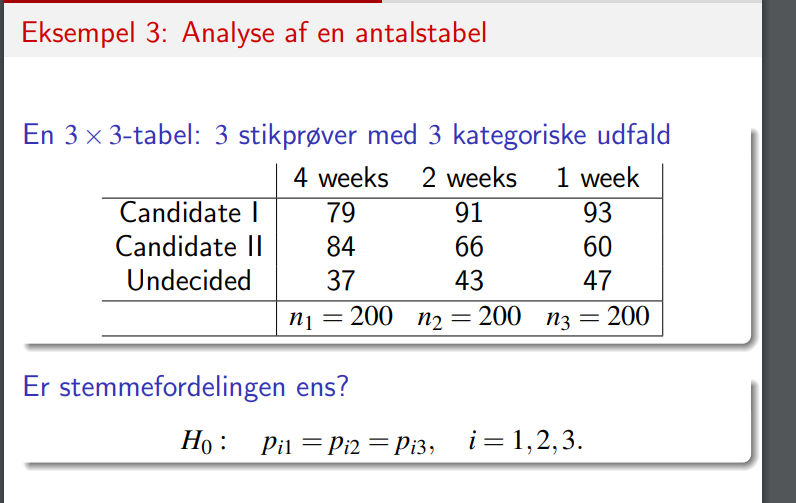

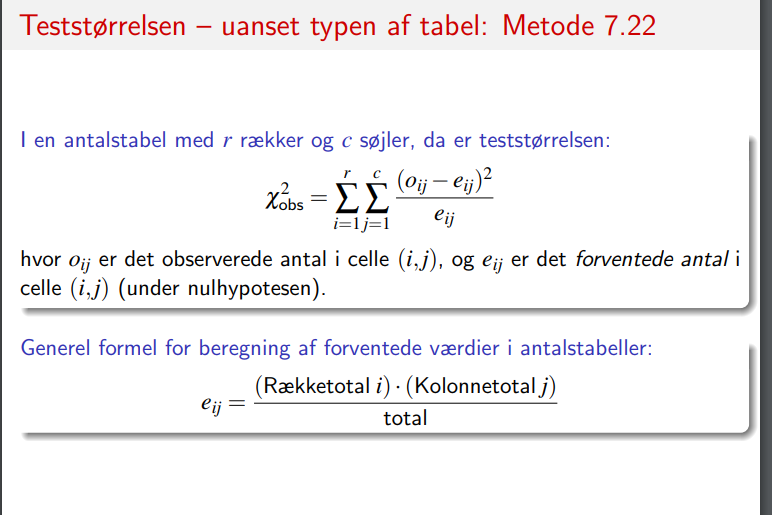

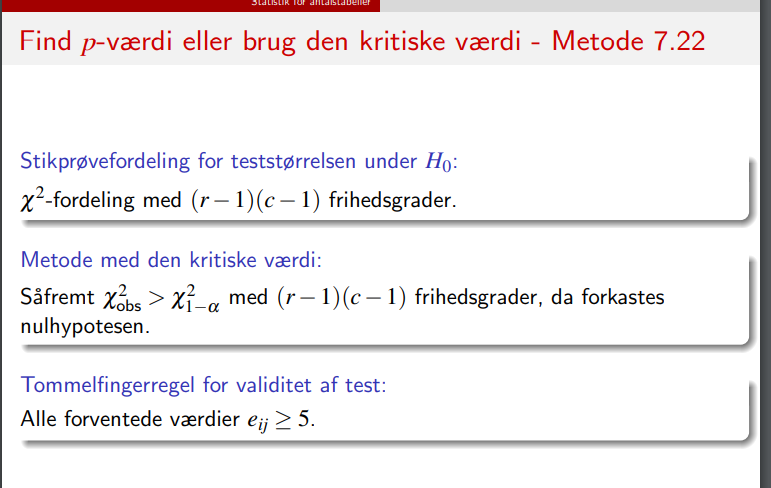

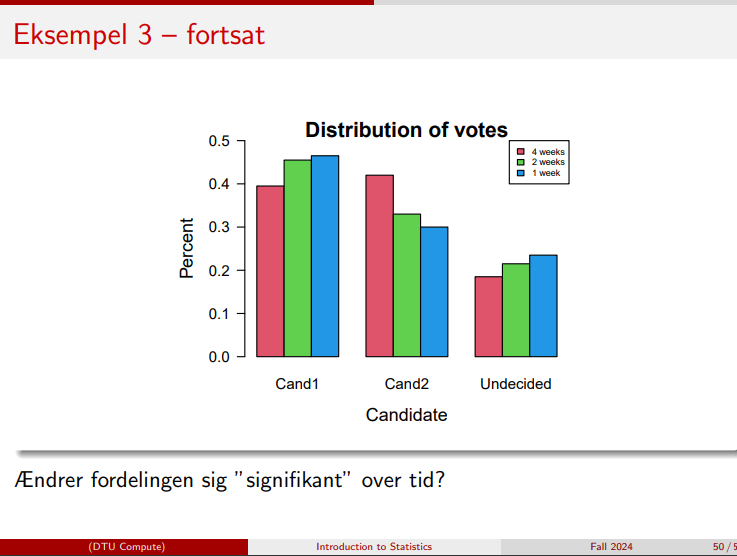

In [27]:
# First put data into a pandas dataframe
poll = np.array([[79, 91, 93], [84, 66, 60], [37, 43, 47]])
print(poll)

[[79 91 93]
 [84 66 60]
 [37 43 47]]


Row 1: votes for Candidate 1 (4, 2 and 1 week(s) before the election) <br>
Row 1: votes for Candidate 2 (4, 2 and 1 week(s) before the election) <br>
Row 1: undecided votes       (4, 2 and 1 week(s) before the election) <br>

In [28]:
# calculate total number of people asked at every sample / timepoint:
print(np.sum(poll, axis=0))

[200 200 200]


In [29]:
# total number for each candidate across all three timepoints:
print(np.sum(poll, axis=1))

[263 210 127]


This is the overall distribution of votes. 

We want to know if the distributions of votes within each timepoint (sample) differs significantly from the overall distribution.

In [30]:
# Now do chi2 test:
chi2, p_val, dof, expected = stats.chi2_contingency(poll, correction=False)

In [31]:
print(expected)

[[87.66666667 87.66666667 87.66666667]
 [70.         70.         70.        ]
 [42.33333333 42.33333333 42.33333333]]


In [32]:
print(chi2)

6.961978041718169


In [33]:
print(p_val)

0.1379112060673381


In [34]:
print(dof)

4
